<h1>Neural Network Regression Project</h1>

This is a world real data set from the historical housing data in King County,USA (where Seattle is)
The data is from this Kaggle link: https://www.kaggle.com/harlfoxem/housesalesprediction
<h3><b>Feature Columns</h3></b>

* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
#import helpful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
 #Read the data
df=pd.read_csv('kc_house_data.csv')

In [3]:
#Find Null value in every columns
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
#get info about the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


C:\Users\Davide\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

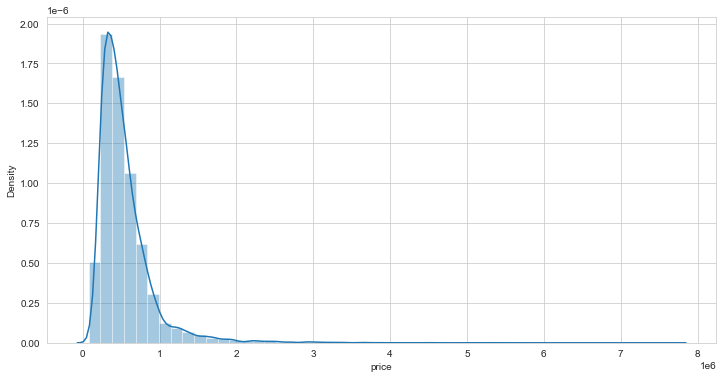

In [7]:
#EDA

#Check house price distribution(HistPrice.png)

plt.figure(figsize=(12,6))
sns.distplot(df['price'])

C:\Users\Davide\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

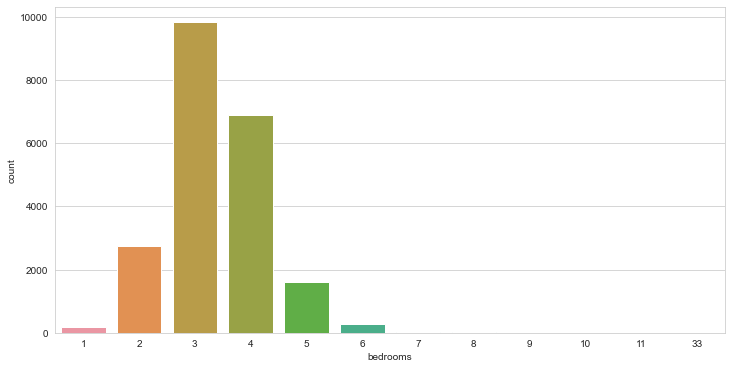

In [8]:
#Check number of bedroom distrubution(BedHist.png)
plt.figure(figsize=(12,6))
sns.countplot(df['bedrooms'])

In [9]:
#Check correlation with price

df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

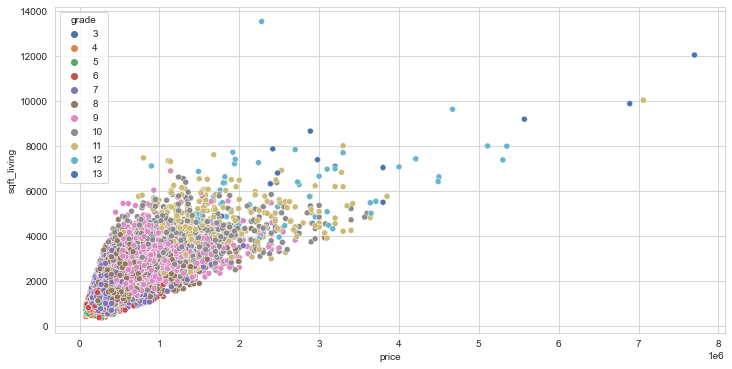

In [10]:
#Scatter plot what is correlated with highly correlated with price
#Price vs Sqftliving(Sqftpricescat.png)
plt.figure(figsize=(12,6))
sns.scatterplot(x='price',y='sqft_living',hue='grade',data=df,palette="deep")

<AxesSubplot:xlabel='price', ylabel='grade'>

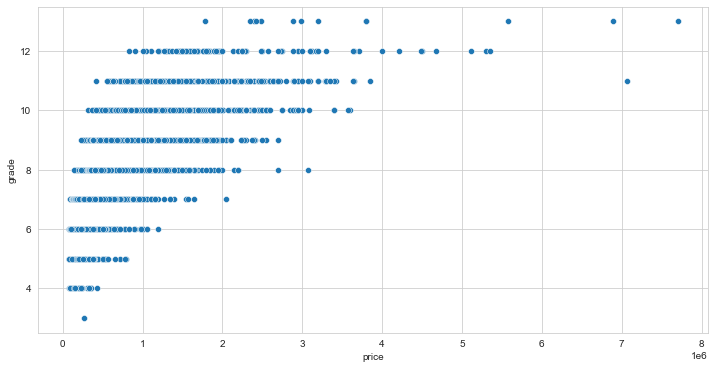

In [11]:
#Price vs grade(gradepricescat.png)
plt.figure(figsize=(12,6))
sns.scatterplot(x='price',y='grade',data=df)

C:\Users\Davide\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

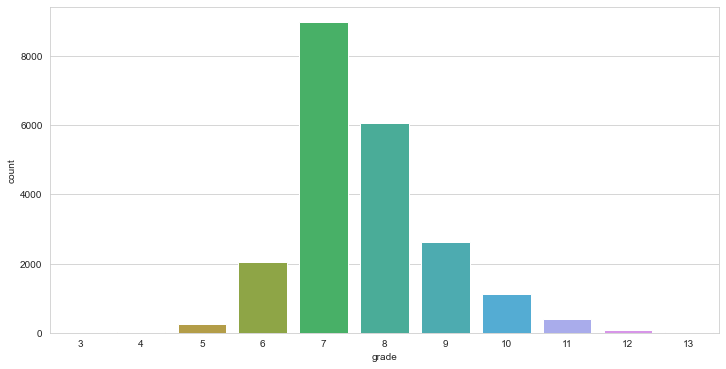

In [12]:
#check grade distibution (gradedis.png)
plt.figure(figsize=(12,6))
sns.countplot(df['grade'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

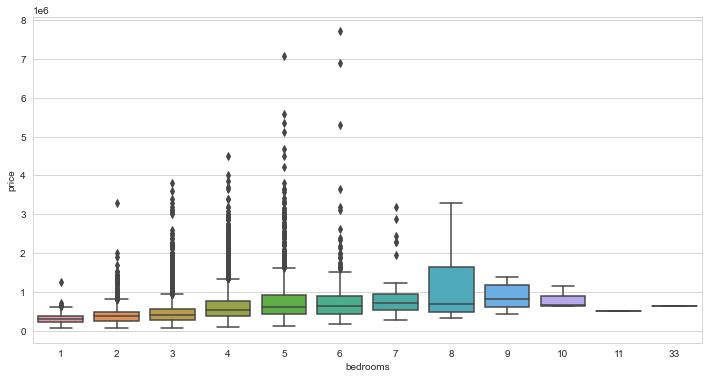

In [13]:
#Bedroom vs Price(bedroompricebox.png)
plt.figure(figsize=(12,6))
sns.boxplot(x='bedrooms',y='price',data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

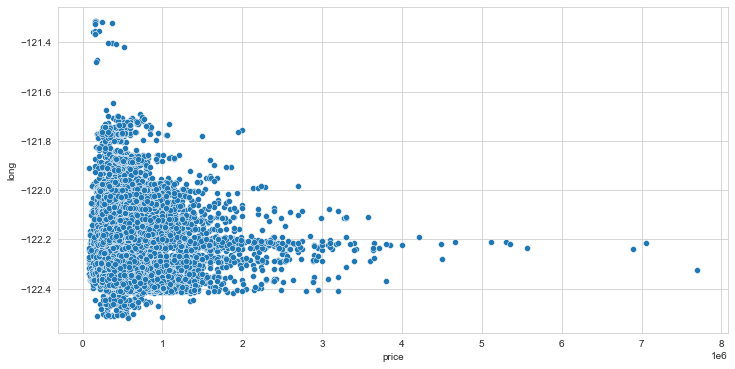

In [14]:
#distibution of prices related to longitude(pricelong.png)
plt.figure(figsize=(12,6))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

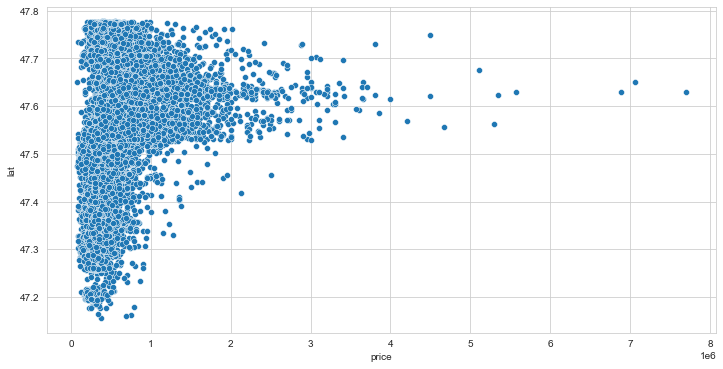

In [15]:
#distibution of prices related to longitude(pricelat.png)
plt.figure(figsize=(12,6))
sns.scatterplot(x='price',y='lat',data=df)

# Map of King County

![title](king-wa-county-map.jpg)

<AxesSubplot:xlabel='long', ylabel='lat'>

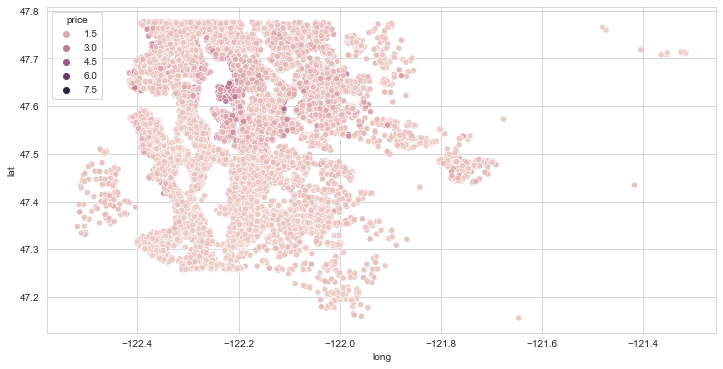

In [20]:
#Scatter plot lan long and see where it is expensive in the map(longlatscat.png)
plt.figure(figsize=(12,6))
sns.scatterplot(x='long',y='lat',hue='price',data=df)

In [25]:
#Explore the data to clean price outliers

df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [27]:
#delete top 1% of houses (Most expensive outliers)
len(df)*0.01

215.97

In [29]:
df_non_top1=df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

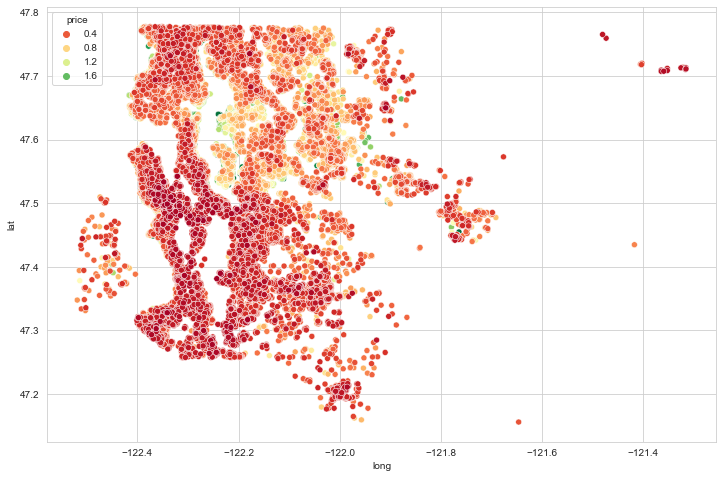

In [32]:
#cleaned lang long scatter(cleanedlatlong.png)
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',hue='price',data=df_non_top1,palette='RdYlGn')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

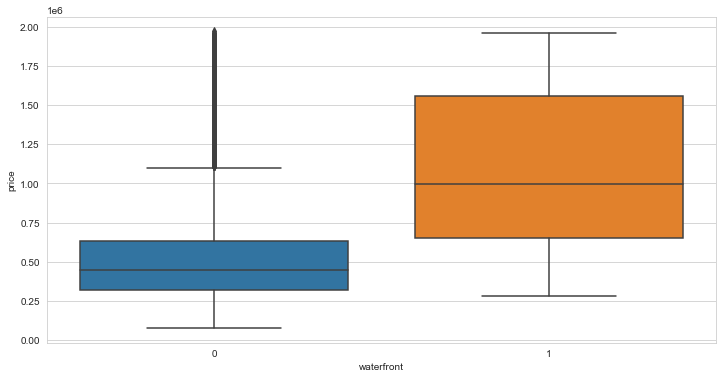

In [33]:
#using the map we can see that the outlier are on the waterfront
#we can plot to see that(boxwater.png)
plt.figure(figsize=(12,6))
sns.boxplot(x='waterfront',y='price',data=df_non_top1)

In [35]:
#drop useless columns(clean and reorganise data) or change columns

df=df.drop('id',axis=1)


KeyError: "['id'] not found in axis"

In [36]:

df['date']=pd.to_datetime(df['date'])

In [42]:
df['year']=df['date'].apply(lambda date:date.year)
df['month']=df['date'].apply(lambda date:date.month)

In [43]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


<AxesSubplot:xlabel='month', ylabel='price'>

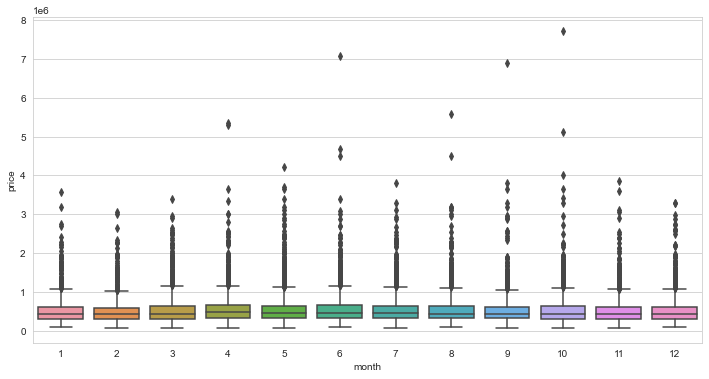

In [45]:
#EDA on new extracted data
#plot month per price(monthpricebox.png)
plt.figure(figsize=(12,6))
sns.boxplot(x='month',y='price',data=df)

<AxesSubplot:xlabel='month'>

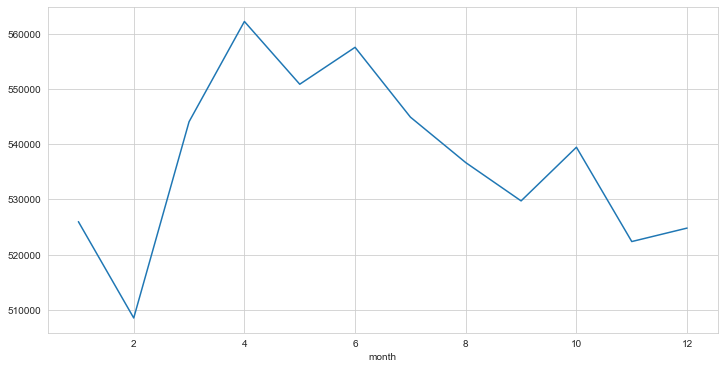

In [48]:
#hard to tell with this plot(monthplot.png)
plt.figure(figsize=(12,6))
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

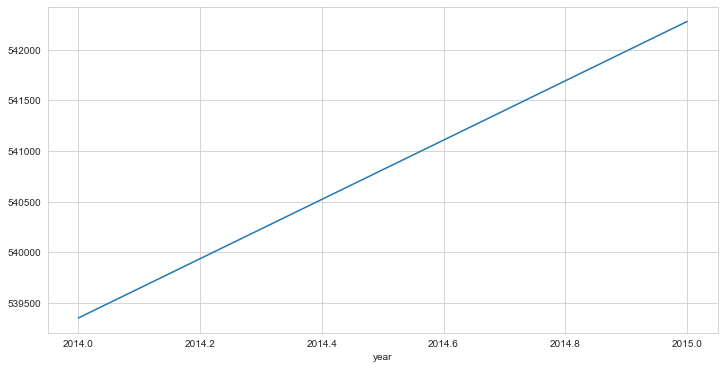

In [49]:
#Year plotting against price(yearplot.png)
plt.figure(figsize=(12,6))
df.groupby('year').mean()['price'].plot()

In [50]:
df=df.drop('date',axis=1)

In [52]:
df=df.drop('zipcode',axis=1)

In [53]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [116]:
#create the train and test data
X=df.drop('price',axis=1).values
y=df['price'].values

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [67]:
#Create the model(layer dense mean that all the neurons betweeen layer are all connected to each other)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [68]:
model=Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

In [69]:
model.compile(optimizer='adam',loss='mse')

In [70]:
#fit the model
model.fit
model.fit(x=X_train,y=y_train,verbose=3,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
Epoch 2/400
Epoch 3/400
Epoch 4/400
Epoch 5/400
Epoch 6/400
Epoch 7/400
Epoch 8/400
Epoch 9/400
Epoch 10/400
Epoch 11/400
Epoch 12/400
Epoch 13/400
Epoch 14/400
Epoch 15/400
Epoch 16/400
Epoch 17/400
Epoch 18/400
Epoch 19/400
Epoch 20/400
Epoch 21/400
Epoch 22/400
Epoch 23/400
Epoch 24/400
Epoch 25/400
Epoch 26/400
Epoch 27/400
Epoch 28/400
Epoch 29/400
Epoch 30/400
Epoch 31/400
Epoch 32/400
Epoch 33/400
Epoch 34/400
Epoch 35/400
Epoch 36/400
Epoch 37/400
Epoch 38/400
Epoch 39/400
Epoch 40/400
Epoch 41/400
Epoch 42/400
Epoch 43/400
Epoch 44/400
Epoch 45/400
Epoch 46/400
Epoch 47/400
Epoch 48/400
Epoch 49/400
Epoch 50/400
Epoch 51/400
Epoch 52/400
Epoch 53/400
Epoch 54/400
Epoch 55/400
Epoch 56/400
Epoch 57/400
Epoch 58/400
Epoch 59/400
Epoch 60/400
Epoch 61/400
Epoch 62/400
Epoch 63/400
Epoch 64/400
Epoch 65/400
Epoch 66/400
Epoch 67/400
Epoch 68/400
Epoch 69/400
Epoch 70/400
Epoch 71/400
Epoch 72/400
Epoch 73/400
Epoch 74/400
Epoch 75/400
Epoch 76/400
Epoch 77/400
Epoch 78

<AxesSubplot:>

<Figure size 864x576 with 0 Axes>

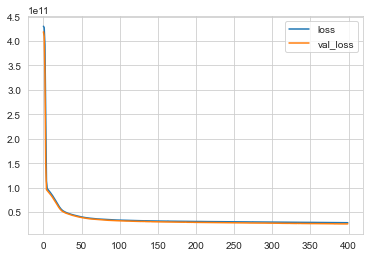

In [74]:
#model evaluation(lossevaluation.png)
loss=pd.DataFrame(model.history.history)
loss.plot()

In [75]:
#prediction of the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [76]:
pred=model.predict(X_test)

In [77]:
#error and evaluation
mean_squared_error(y_test,pred)

26164322071.025368

In [78]:
np.sqrt(mean_squared_error(y_test,pred))

161753.89352663312

In [79]:
#avg error
mean_absolute_error(y_test,pred)

101335.41279779129

In [81]:
#explain the variance score from 0 to 1(best)
explained_variance_score(y_test,pred)

0.803964677725989

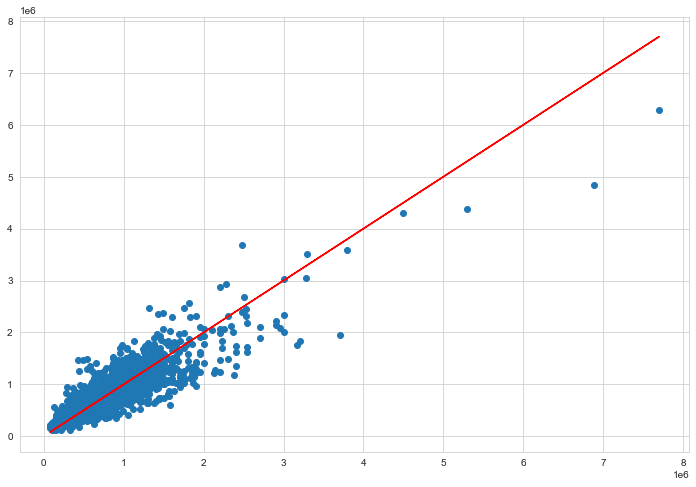

In [86]:
#plot the prediction vs the result(predvsresultscat.png)
plt.figure(figsize=(12,8))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r')

In [104]:
#predict a new value
new_house=df.drop('price',axis=1).iloc[0].values.reshape(-1,19)
new_house

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [105]:
new_house=scaler.transform(new_house)

In [106]:
model.predict(new_house)

array([[292268.6]], dtype=float32)

In [107]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [109]:
#Create a new model without the 1%
df_non_top1.head()
#clean , reshape and change the data
df_non_top1['date']=pd.to_datetime(df_non_top1['date'])
df_non_top1['year']=df_non_top1['date'].apply(lambda date:date.year)
df_non_top1['month']=df_non_top1['date'].apply(lambda date:date.month)

In [112]:
df_non_top1=df_non_top1.drop('id',axis=1)
df_non_top1=df_non_top1.drop('zipcode',axis=1)
df_non_top1=df_non_top1.drop('date',axis=1)


KeyError: "['id'] not found in axis"

In [113]:
df_non_top1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
6329,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,47.5876,-122.204,2960,10347,2014,6
12271,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,47.5632,-122.215,3700,14486,2014,10
9166,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,47.5287,-122.220,3730,16560,2015,2
12565,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,47.6422,-122.157,3900,35237,2015,4
1150,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,47.7165,-122.259,2630,13868,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,82500.0,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,0,47.4799,-122.296,1572,10570,2014,5
8267,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,47.4987,-122.341,1140,11250,2014,11
16184,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,47.4808,-122.315,860,9000,2015,3
465,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,47.6499,-121.909,1200,7500,2014,5


In [143]:
#create the train and test data
X1=df_non_top1.drop('price',axis=1).values
y1=df_non_top1['price'].values

In [144]:
#Create and scale the train and test data
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=101)

In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler()
X_train1=scaler1.fit_transform(X_train1)
X_test1=scaler1.transform(X_test1)

In [146]:
#Create the model
model_new=Sequential()

model_new.add(Dense(19,activation='relu'))
model_new.add(Dense(19,activation='relu'))
model_new.add(Dense(19,activation='relu'))
model_new.add(Dense(19,activation='relu'))

model_new.add(Dense(1))

In [147]:
model_new.compile(optimizer='adam',loss='mse')

In [148]:
#fit the model
model_new.fit
model_new.fit(x=X_train1,y=y_train1,validation_data=(X_test1,y_test1),batch_size=128,epochs=400)

Epoch 1/400
117/117 [==============================] - 1s 4ms/step - loss: 345683388728.4068 - val_loss: 356795711488.0000
Epoch 2/400
117/117 [==============================] - 0s 2ms/step - loss: 347179837197.0170 - val_loss: 351781224448.0000
Epoch 3/400
117/117 [==============================] - 0s 3ms/step - loss: 332627069101.5593 - val_loss: 308979728384.0000
Epoch 4/400
117/117 [==============================] - 0s 3ms/step - loss: 274021948051.5254 - val_loss: 177353900032.0000
Epoch 5/400
117/117 [==============================] - 0s 2ms/step - loss: 135760885378.1695 - val_loss: 64548814848.0000
Epoch 6/400
117/117 [==============================] - 0s 3ms/step - loss: 57688397546.3051 - val_loss: 54714818560.0000
Epoch 7/400
117/117 [==============================] - 0s 2ms/step - loss: 52330220700.2034 - val_loss: 53713264640.0000
Epoch 8/400
117/117 [==============================] - 0s 2ms/step - loss: 51165617724.7458 - val_loss: 52741885952.0000
Epoch 9/400
117/117 [==

117/117 [==============================] - 1s 5ms/step - loss: 23131696023.8644 - val_loss: 24298264576.0000
Epoch 69/400
117/117 [==============================] - 1s 5ms/step - loss: 22681389368.4068 - val_loss: 24251879424.0000
Epoch 70/400
117/117 [==============================] - 0s 3ms/step - loss: 23928186151.0508 - val_loss: 24125341696.0000
Epoch 71/400
117/117 [==============================] - 1s 6ms/step - loss: 23166949723.1186 - val_loss: 24197947392.0000
Epoch 72/400
117/117 [==============================] - 0s 3ms/step - loss: 23408543483.6610 - val_loss: 24031221760.0000
Epoch 73/400
117/117 [==============================] - 1s 6ms/step - loss: 22107453006.1017 - val_loss: 24017766400.0000
Epoch 74/400
117/117 [==============================] - 0s 2ms/step - loss: 22338008740.8814 - val_loss: 23939188736.0000
Epoch 75/400
117/117 [==============================] - 0s 2ms/step - loss: 22822277397.6949 - val_loss: 23985166336.0000
Epoch 76/400
117/117 [===============

Epoch 135/400
117/117 [==============================] - 0s 3ms/step - loss: 20450867599.1864 - val_loss: 22289104896.0000
Epoch 136/400
117/117 [==============================] - 0s 4ms/step - loss: 20658308755.5254 - val_loss: 22266630144.0000
Epoch 137/400
117/117 [==============================] - 0s 3ms/step - loss: 20756225544.6780 - val_loss: 22254753792.0000
Epoch 138/400
117/117 [==============================] - 1s 5ms/step - loss: 20583235557.9661 - val_loss: 22237437952.0000
Epoch 139/400
117/117 [==============================] - 1s 6ms/step - loss: 20500841159.5932 - val_loss: 22289217536.0000
Epoch 140/400
117/117 [==============================] - 1s 6ms/step - loss: 21664680474.0339 - val_loss: 22232023040.0000
Epoch 141/400
117/117 [==============================] - 1s 5ms/step - loss: 21021190196.0678 - val_loss: 22198831104.0000
Epoch 142/400
117/117 [==============================] - 1s 6ms/step - loss: 21277848471.8644 - val_loss: 22219636736.0000
Epoch 143/400
11

117/117 [==============================] - 0s 2ms/step - loss: 20367537368.9492 - val_loss: 21787017216.0000
Epoch 202/400
117/117 [==============================] - 0s 2ms/step - loss: 21253931858.4407 - val_loss: 21769912320.0000
Epoch 203/400
117/117 [==============================] - 0s 2ms/step - loss: 21655516541.8305 - val_loss: 21764734976.0000
Epoch 204/400
117/117 [==============================] - 0s 3ms/step - loss: 19962548952.9492 - val_loss: 21749608448.0000
Epoch 205/400
117/117 [==============================] - 0s 3ms/step - loss: 20877614921.7627 - val_loss: 21741664256.0000
Epoch 206/400
117/117 [==============================] - 0s 2ms/step - loss: 21467296195.2542 - val_loss: 21743773696.0000
Epoch 207/400
117/117 [==============================] - 0s 2ms/step - loss: 20924639370.8475 - val_loss: 21735694336.0000
Epoch 208/400
117/117 [==============================] - 0s 3ms/step - loss: 20288753629.2881 - val_loss: 21732265984.0000
Epoch 209/400
117/117 [=======

117/117 [==============================] - 0s 3ms/step - loss: 20371777483.9322 - val_loss: 21601060864.0000
Epoch 268/400
117/117 [==============================] - 0s 2ms/step - loss: 20473523790.1017 - val_loss: 21548806144.0000
Epoch 269/400
117/117 [==============================] - 0s 3ms/step - loss: 21753382217.7627 - val_loss: 21572243456.0000
Epoch 270/400
117/117 [==============================] - 0s 3ms/step - loss: 19842833191.0508 - val_loss: 21568858112.0000
Epoch 271/400
117/117 [==============================] - 0s 2ms/step - loss: 20340112731.1186 - val_loss: 21546573824.0000
Epoch 272/400
117/117 [==============================] - 0s 3ms/step - loss: 20891674103.3220 - val_loss: 21564219392.0000
Epoch 273/400
117/117 [==============================] - 0s 4ms/step - loss: 19898857159.5932 - val_loss: 21551822848.0000
Epoch 274/400
117/117 [==============================] - 0s 3ms/step - loss: 20664441352.6780 - val_loss: 21537656832.0000
Epoch 275/400
117/117 [=======

117/117 [==============================] - 0s 2ms/step - loss: 20292607140.8814 - val_loss: 21434660864.0000
Epoch 334/400
117/117 [==============================] - 0s 2ms/step - loss: 20232613523.5254 - val_loss: 21447102464.0000
Epoch 335/400
117/117 [==============================] - 0s 2ms/step - loss: 20443589250.1695 - val_loss: 21443045376.0000
Epoch 336/400
117/117 [==============================] - 0s 3ms/step - loss: 20226878368.5424 - val_loss: 21428963328.0000
Epoch 337/400
117/117 [==============================] - 0s 3ms/step - loss: 20385202349.5593 - val_loss: 21428903936.0000
Epoch 338/400
117/117 [==============================] - 0s 2ms/step - loss: 20514151389.2881 - val_loss: 21410410496.0000
Epoch 339/400
117/117 [==============================] - 0s 2ms/step - loss: 20623904039.0508 - val_loss: 21407997952.0000
Epoch 340/400
117/117 [==============================] - 0s 3ms/step - loss: 20559176825.4915 - val_loss: 21402066944.0000
Epoch 341/400
117/117 [=======

117/117 [==============================] - 0s 2ms/step - loss: 20591592083.5254 - val_loss: 21298583552.0000
Epoch 400/400
117/117 [==============================] - 0s 3ms/step - loss: 20086632951.3220 - val_loss: 21366683648.0000


<AxesSubplot:>

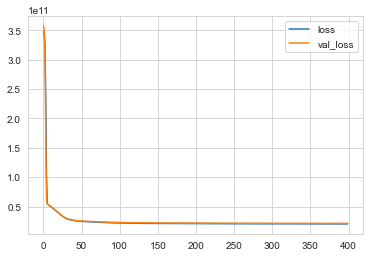

In [149]:
#model evaluation(lossevaluation_new.png)
loss_new=pd.DataFrame(model_new.history.history)
loss_new.plot()

In [150]:
pred_new=model_new.predict(X_test1)

In [151]:
#error and evaluation
mean_squared_error(y_test1,pred_new)

21366683303.731194

In [152]:
np.sqrt(mean_squared_error(y_test1,pred_new))

146173.46990384813

In [153]:
#avg error
mean_absolute_error(y_test1,pred_new)

97410.89180144193

In [155]:
#explain the variance score from 0 to 1(best)
explained_variance_score(y_test1,pred_new)

0.7418654828301325

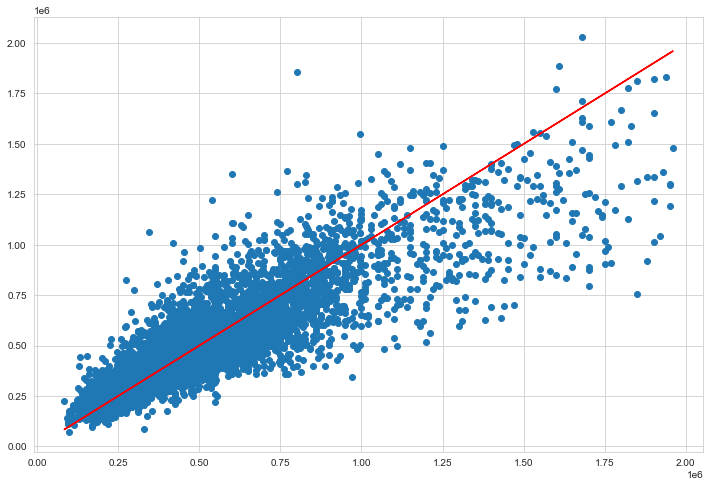

In [159]:
#plot the prediction vs the result(predvsresultscat_new.png)
plt.figure(figsize=(12,8))
plt.scatter(y_test1,pred_new)
plt.plot(y_test1,y_test1,'r')

In [ ]:
#Model comparison 100% data vs 99% data
#Mean Squared Error = 26164322071.025368 vs 21366683303.731194
#Root mean squared = 161753.89352663312 vs 
#Mean Absolute error = 101335.41279779129 vs 97410.89180144193
#Explained variance =0.803964677725989 vs 0.7418654828301325

#Conclusion and possible future development
#The new model (99%) is able to reduce the error compare to the first model(100%) trading off a lower explained variance 
#and a lower range of data trained on and suitable for the model.

#A possible further implementation could be to delete even mre outlier and train a new model on just the batch of data with
#more similar attributes and too see if the model improve it's efficency